
#Przetwarzanie Języków Naturalnych - Filip Pilarek, Kamil Stecyk

Na początku czytamy oraz odrzucamy niepotrzebne linie pliku.

In [79]:
import os
import requests

url = 'https://www.ic.unicamp.br/~stolfi/voynich/mirror/reeds/docs/FSG.txt'
fileName = "FSG.txt"

if not os.path.exists(fileName):
    r = requests.get(url, allow_redirects=True)
    open(fileName, 'wb').write(r.content)
    
# we delete everything after ( #page 119 and 120 ) and comments
with open(fileName, "r") as f:
    lines = f.readlines()
with open(fileName, "w") as f:
    for line in lines:
        if "# page 119 and 120" not in line:
          if "#" not in line:
            f.write(line)    
        else:
            break;

with open(fileName, "r") as f:
    lines = f.readlines()
with open(fileName, "w") as f:
    for line in lines:
        if "#" not in line and not line.strip()=="":
            line = line.replace("=", "")
            line = line.replace("-", "")
            line = line.replace("(", "")
            line = line.replace(")", "")
            line = line.replace("|", "")
            line = line.replace(",", " ")
            f.write(line)

Następnie liczymy wystąpienia wszystkich słów w pliku

In [80]:
# parsing
occurences_dict = {}
fileName = "FSG.txt"
file = open(fileName, 'r')
tmp_word = ""
while 1:
     
    # read by character
    char = file.read(1)         
    if not char:
        break
             
    if char != ' ' and char !="\n":
        tmp_word += char
    else:
        if tmp_word not in occurences_dict:
            occurences_dict[tmp_word] = 0 
        occurences_dict[tmp_word] += 1
        tmp_word = ""
 
file.close()
import operator
sort_by_word = operator.itemgetter(1)
occurences_dict_sorted = dict(sorted(occurences_dict.items(), key=sort_by_word, reverse=True))

A na końcu sortujemy wyrazy po ilości wystąpień i robimy z tego wykres dla wartości p*r.

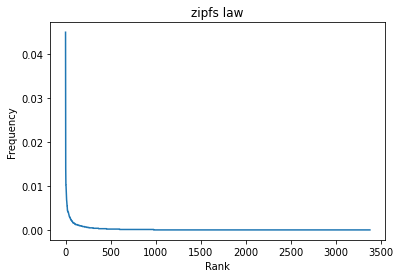

In [81]:
import matplotlib.pyplot as plt
# x axis values
x = list(range(0, len(occurences_dict_sorted)))
# corresponding y axis values
y = []
for entry,value in occurences_dict_sorted.items():
     y.append(round(value/sum(occurences_dict_sorted.values()), 5))
# plotting the points 
plt.plot(x, y)
# naming the x axis
plt.xlabel('Rank')
# naming the y axis
plt.ylabel('Frequency')
# giving a title to my graph
plt.title('zipfs law')
  
# function to show the plot
plt.show()

Z wykresu wynika, że manuskrypt spełnia prawo zipfa.

Tutaj, wszystko to samo co wyżej lecz dla artykułu w języku niemieckim.

In [99]:
def parse_txt_and_make_graph(fileName):
    occurences_dict = {}

    file = open(fileName, 'r')

    tmp_word = ""

    # Loop through each line of the file
    for line in file:
        # Remove the leading spaces and newline character
        line = line.strip()
        # Convert the characters in line to
        # lowercase to avoid case mismatch
        line = line.lower()
        # Split the line into words
        words = line.split(" ")
        # Iterate over each word in line
        for word in words:
            word = word.replace("=", "")
            word = word.replace("-", "")
            word = word.replace("(", "")
            word = word.replace(")", "")
            word = word.replace("|", "")
            word = word.replace("\n", "")
            # Check if the word is already in dictionary
            word = word.lower()
            if word in occurences_dict:
                # Increment count of word by 1
                occurences_dict[word] = occurences_dict[word] + 1
            else:
                # Add the word to dictionary with count 1
                occurences_dict[word] = 1
    file.close()
    import operator
    sort_by_word = operator.itemgetter(1)
    occurences_dict_sorted = dict(sorted(occurences_dict.items(), key=sort_by_word, reverse=True))
    import matplotlib.pyplot as plt
    # x axis values
    x = list(range(0, len(occurences_dict_sorted)))
    # corresponding y axis values
    y = []
    for entry,value in occurences_dict_sorted.items():
        y.append(round(value/sum(occurences_dict_sorted.values()), 6))
    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('frequency')
    # naming the y axis
    plt.ylabel('words count')

    # giving a title to my graph
    plt.title('Prawo zipfa')

    # function to show the plot
    plt.show()


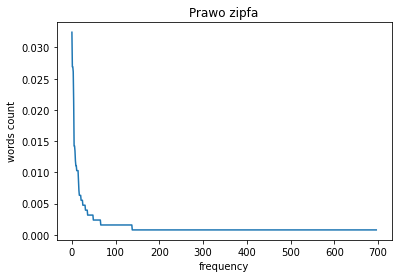

In [102]:
parse_txt_and_make_graph("wikipedia.txt")

Tutaj znowu kształtuje nam się wykres spełniający 
prawo zipfa.

Teraz przejdziemy do bigramów dla powyższych tekstów.

In [96]:
def parse_txt_to_bigram_and_make_graph(fileName):
    occurences_dict = {}

    file = open(fileName, 'r')

    tmp_word = ""

    all_words = []
    # Loop through each line of the file
    for line in file:
        # Remove the leading spaces and newline character
        line = line.strip()
        # Convert the characters in line to
        # lowercase to avoid case mismatch
        line = line.lower()
        # Split the line into words
        words = line.split(" ")
        # Iterate over each word in line
        for word in words:
            word = word.replace("=", "")
            word = word.replace("-", "")
            word = word.replace("(", "")
            word = word.replace(")", "")
            word = word.replace("|", "")
            word = word.replace("\"", "")
            word = word.replace("\n", "")
            if not line.strip() == "":
              all_words.append(word.lower())

    file.close()
    ## Bigramy
    words_bigram = [(all_words[x], all_words[x+1]) for x in range(len(all_words)-1)]
    unique = set(words_bigram)
    print(len(unique))
    count = {bigram: words_bigram.count(bigram) for bigram in unique}
    ##sortowanie
    import operator
    sort_by_word = operator.itemgetter(1)
    occurences_dict_sorted = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))
    import matplotlib.pyplot as plt
    x = list(range(0, len(occurences_dict_sorted)))
    # corresponding y axis values
    y = []
    for el in occurences_dict_sorted:
        y.append(occurences_dict_sorted[el]/sum(occurences_dict_sorted.values()))
    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('frequency')
    # naming the y axis
    plt.ylabel('words count')

    # giving a title to my graph
    plt.title('Prawo zipfa')

    # function to show the plot
    plt.show()

9927


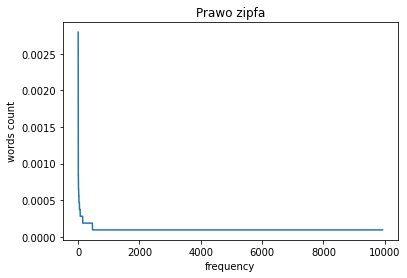

In [97]:
parse_txt_to_bigram_and_make_graph("FSG.txt")

1188


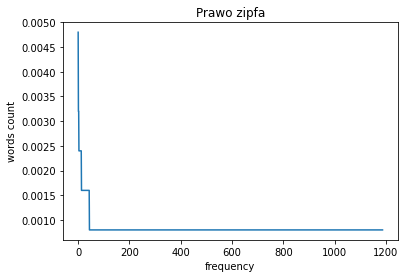

In [98]:
parse_txt_to_bigram_and_make_graph("wikipedia.txt")

Jak możemy zaobserwować dla bigramów również spełniają one prawo zipfa.